<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/PCA_e_addestramento_decisionTree_e_ottimizzazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applicazione delle tecniche di PCA su proiezioni del dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HCV-Egy-Data.csv', delimiter=',')
print(df)

      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    2          2          

In [3]:
df.groupby('Baselinehistological staging').count()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
Baselinehistological staging,,,,,,,,,,,,,,,,,,,,,
1,336,336,336,336,336,336,336,336,336,336,...,336,336,336,336,336,336,336,336,336,336
2,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
3,355,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
4,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,362


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()

Effettuiamo l'esperimento di feature reduction andando a ridurre le 5 feature in una sola feature aggregata cercando si aggregare gli attributi inerenti ai test di RNA.

In [5]:
from sklearn.decomposition import PCA

# Seleziona solo le colonne contenenti i tuoi attributi (5 colonne nel tuo caso)
X_projection = df[['RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']]

# Inizializza l'oggetto PCA e specifica il numero di componenti desiderate (1 nel tuo caso)
pca = PCA(n_components=1)

# Applica la PCA al tuo dataset
X_projection_reduced = pca.fit_transform(X_projection)

# andiiamo a creare un file excel per analizzare gli effetti della PCA
my_series_pca = pd.Series(X_projection_reduced.flatten())
# my_series_pca.to_excel("projection_RNA_pca.xlsx")
my_series_pca.describe()

count    1.385000e+03
mean    -1.075896e-11
std      3.740956e+05
min     -7.396683e+05
25%     -2.709325e+05
50%      2.502379e+04
75%      2.856185e+05
max      1.823453e+06
dtype: float64

Ripetiamo l'esperimento di data reduction sul le feature delle transaminasi

In [6]:
# ripetiamo il processo su di un'altra proiezione che vada a prendere gli attributi delle transaminasi
X2_projection = df[['AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w']]
pca_2 = PCA(n_components=1)
X2_projection_reduced = pca_2.fit_transform(X2_projection)
my_series_pca2 = pd.Series(X2_projection_reduced.flatten())
# per generare i file excell da visualizzare
# my_series_pca2.to_excel("projection_trans_pca2.xlsx")
my_series_pca2.describe()

count    1.385000e+03
mean    -1.477518e-15
std      2.794563e+01
min     -7.851647e+01
25%     -1.922776e+01
50%     -2.076178e-01
75%      1.939534e+01
max      8.093051e+01
dtype: float64

In [7]:
df_wout_grading = df.drop('Baseline histological Grading', axis=1)
df_wout_grading

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,81,5,5,5,655330,634536,288194,5,5,2
1,46,1,29,1,2,2,1,2,2,1,...,113,57,123,44,40620,538635,637056,336804,31085,2
2,57,1,33,2,2,2,2,1,1,1,...,116,5,5,5,571148,661346,5,735945,558829,4
3,49,2,33,1,2,1,2,1,2,1,...,88,48,77,33,1041941,449939,585688,744463,582301,3
4,59,1,32,1,1,2,1,2,2,2,...,120,94,90,30,660410,738756,3731527,338946,242861,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,127,63,44,45,387795,55938,5,5,5,4
1381,55,1,34,1,2,2,1,1,1,1,...,108,97,64,41,481378,152961,393339,73574,236273,2
1382,42,1,26,2,2,1,1,1,2,1,...,116,87,39,24,612664,572756,806109,343719,160457,2
1383,52,1,29,2,1,1,2,2,2,1,...,47,48,81,43,139872,76161,515730,2460,696074,3


In [8]:
column_to_drop = ['AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w','RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']
df_reduced = df_wout_grading.drop(column_to_drop, axis=1)
df_reduced

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,7044,4957174.0,15,202520.0,4
1381,55,1,34,1,2,2,1,1,1,1,6207,4636951.0,10,115776.0,2
1382,42,1,26,2,2,1,1,1,2,1,4913,4122038.0,14,128354.0,2
1383,52,1,29,2,1,1,2,2,2,1,7257,4241990.0,10,205908.0,3


andreamo adesso a creare il nuovo data set contenente le due riduzioni fatte e su tale data set proveremo l'addestramento di un albero

In [9]:
# Creazione delle due Series di esempio
my_series_pca
my_series_pca2

# Unione del DataFrame e delle Series per colonne
merged_df_pca = pd.concat([df_reduced, my_series_pca, my_series_pca2], axis=1)

# Stampa del DataFrame risultante
print(merged_df_pca)

      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain     WBC  \
0                                    2          2        

In [10]:
# salviamo un dataset in questo formato per esperimenti futuri
merged_df_pca.to_excel("pca_reduced_data_frame_uncleaned.xlsx")
merged_df_pca.to_csv("pca_reduced_df_uncleaned.csv", index=False)


## Addestramento di un albero decisionale

Siamo pronti per testare un modello di apprendimento e capire che risultati produca con il dataset non ottimizzato.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [12]:
# Preparazione delle features e del target
X = df_reduced.drop('Baselinehistological staging', axis=1)
y = df_reduced['Baselinehistological staging']

# con questo approccio stiamo provando a effettuare uno spilt dei dati di partenza
# per generare le parttizioni di training e test con percentuale 80-20 in seguito useremo
# solo la partizione di training per effetttuare la cross validation su tali dati e in
# seguito sulla partizione di test restante la utilizzero alla fine sui dati mai visti
# Divisione del dataset in dati di training e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7) # random_state = 7 batte la moda !!! but is very low

# Creazione del modello di albero decisionale
model = DecisionTreeClassifier(criterion='gini')

# Applicazione della cross-validation con 10 fold sui dati di training ovvero 80%
# tirato fuori dalla funzione di split
scores = cross_val_score(model, X_train, y_train, cv=10)
# Calcolo della media delle performance ottenute
mean_accuracy = scores.mean()

# Addestramento del modello sui dati di training completi
model.fit(X_train, y_train)

# Valutazione del modello sui dati di test
test_accuracy = model.score(X_test, y_test)

# Stampa delle performance
print("Accuracy media (cross-validation):", mean_accuracy)
print("Accuracy sui dati di test:", test_accuracy)

Accuracy media (cross-validation): 0.25681935483870966
Accuracy sui dati di test: 0.2805755395683453


Qui abbiamo provato l'approcio classico della letturatura di andare a lavorare con l'intero dataset e dopo averlo diviso in 10 partizioni uguali ne lasciamo una fuori e le restanti 9 faranno da training e il processo itererà per cambiare la partizione di test e ottenere 10 risultati differenti. Quello che stavamo facendo prima aveva una sua logica simile ad avere un evaluete set per runnare la cross-val su la parte grossa della partizione, e poi usare il test set che realmente sono dati mai visti per il model e mettere a confronto un single run sui dati di training uguali a quelli della stessa partizione della cross-val ma che in questo caso saranno usati esclusivamente per il training e la parte tirata fuori inizialmente con la split function viene ad essere utilizzata per il test di accurancy in seguito si confrontavano le performance tra la media ottenuta dalla cross e il single shoot come descritto. Ora invece usiamo un classico approccio only cross-val e vediamo che succede.

In [13]:
# standard way to use the cross-val without the evaluate set
# Proviamo a vedere se ci sono differenze nelle performa utilizzando solo la cross-validation
model_only_cval = DecisionTreeClassifier(criterion='gini')

# usiamo la cross-val
scores2 = cross_val_score(model_only_cval, X, y, cv=10)
mean_accurancy2 = scores2.mean()
print(scores2)
print(mean_accurancy2)

[0.31654676 0.20863309 0.25179856 0.1942446  0.25899281 0.19565217
 0.26811594 0.2173913  0.22463768 0.2173913 ]
0.2353404233135231


Ora poiché stiamo lanciando modelli facendo prove e vedendo cosa accade cerchiamo di mettere un po di scienza a supporto e andiamo ad ottimizzare per vedere se otteniamo qualche miglioramento. Per cui l'idea sarà effettuare una prova con 4 valori standard di cross-val e in seguito andremo a cercare qualcosa di più sofisticato.

Com il seguente snipet andiamo a creare un particolare oggetto che contiene tutte le info sull'albero decisionale appena addestrato e che ci permetterà di vedere i sui nodi e i test effettuati.

#### Visualizzazione dei parametri dell'ablbero decisionale

In [18]:
import graphviz
from sklearn import tree

# andiamo a creare un file formato dot che raccolga le info sull'albero addestrato in modo da
# poter creare un immagine che mostri i nodi dell'albero con le informazioni contenute al suo interno.
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("albero_decisionale", format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.812331 to fit


'albero_decisionale.png'

In [19]:
# Visualizzazione dell'importanza delle feature
print("Importanza delle feature:")
print(model.feature_importances_)

# Visualizzazione dell'albero decisionale
# print("Rappresentazione interna dell'albero:")
# print(model.tree_)

Importanza delle feature:
[0.12523567 0.02085032 0.10931475 0.01991997 0.02709951 0.02002801
 0.02206965 0.02780346 0.01510557 0.03389512 0.15010891 0.18672431
 0.05976998 0.18207478]
Rappresentazione interna dell'albero:


Andiamo a visualizzare il numero di esempi che sono stati catturati in ogni foglia del nostro albero e vediamo che lavora è stato svolto dal modello.

In [21]:
# Assegna ogni campione al nodo foglia corrispondente
leaf_indices = model.apply(X)

# Conta il numero di campioni in ogni nodo foglia
unique_leaves, counts = np.unique(leaf_indices, return_counts=True)

# Stampa il numero di campioni in ogni nodo foglia
for leaf, count in zip(unique_leaves, counts):
    print(f"Nodo foglia {leaf} - Numero di esempi: {count}")

Nodo foglia 8 - Numero di esempi: 3
Nodo foglia 9 - Numero di esempi: 1
Nodo foglia 12 - Numero di esempi: 1
Nodo foglia 13 - Numero di esempi: 1
Nodo foglia 14 - Numero di esempi: 10
Nodo foglia 16 - Numero di esempi: 1
Nodo foglia 17 - Numero di esempi: 2
Nodo foglia 22 - Numero di esempi: 1
Nodo foglia 24 - Numero di esempi: 1
Nodo foglia 25 - Numero di esempi: 1
Nodo foglia 26 - Numero di esempi: 8
Nodo foglia 30 - Numero di esempi: 1
Nodo foglia 31 - Numero di esempi: 9
Nodo foglia 32 - Numero di esempi: 3
Nodo foglia 36 - Numero di esempi: 1
Nodo foglia 37 - Numero di esempi: 2
Nodo foglia 39 - Numero di esempi: 6
Nodo foglia 42 - Numero di esempi: 1
Nodo foglia 43 - Numero di esempi: 2
Nodo foglia 45 - Numero di esempi: 2
Nodo foglia 47 - Numero di esempi: 2
Nodo foglia 48 - Numero di esempi: 1
Nodo foglia 51 - Numero di esempi: 4
Nodo foglia 54 - Numero di esempi: 6
Nodo foglia 55 - Numero di esempi: 1
Nodo foglia 57 - Numero di esempi: 1
Nodo foglia 58 - Numero di esempi: 1
No

Molti nodi foglia hanno pochissimi esempi la maggiorparte hanno 2 o 1 esempio sembra che il modello si stia adattando troppo ai dati di training.

Proviamo ad addestrare un altro albero che abbia un minimo di supporto nelle foglie pari a 10 esempi.

In [47]:
# OTTIMO TEST QUESTO MODELLO SEMBRA PROMETTENTE
# istanziamo un modello di albero decisionale con minimo supporto nelle foglie a 10
treeClf = tree.DecisionTreeClassifier(min_samples_leaf=10)

# usiamo la cross-val
scores_treeClf = cross_val_score(treeClf, X, y, cv=10)
mean_accurancy_treeClf = scores_treeClf.mean()
print(scores_treeClf)
print(mean_accurancy_treeClf)

[0.25899281 0.23021583 0.26618705 0.35251799 0.26618705 0.19565217
 0.3115942  0.21014493 0.29710145 0.27536232]
0.26639557918882284


In [50]:
# Assegna ogni campione al nodo foglia corrispondente
leaf_indices_treeClf = treeClf.apply(X)

# Conta il numero di campioni in ogni nodo foglia
unique_leaves_treeClf, counts_treeClf = np.unique(leaf_indices_treeClf, return_counts=True)

# Stampa il numero di campioni in ogni nodo foglia
for leaf1, count1 in zip(unique_leaves_treeClf, counts_treeClf):
    print(f"Nodo foglia {leaf1} - Numero di esempi: {count1}")

Nodo foglia 7 - Numero di esempi: 13
Nodo foglia 9 - Numero di esempi: 11
Nodo foglia 13 - Numero di esempi: 11
Nodo foglia 14 - Numero di esempi: 15
Nodo foglia 16 - Numero di esempi: 12
Nodo foglia 17 - Numero di esempi: 11
Nodo foglia 20 - Numero di esempi: 10
Nodo foglia 21 - Numero di esempi: 19
Nodo foglia 23 - Numero di esempi: 11
Nodo foglia 24 - Numero di esempi: 10
Nodo foglia 27 - Numero di esempi: 17
Nodo foglia 28 - Numero di esempi: 13
Nodo foglia 32 - Numero di esempi: 19
Nodo foglia 33 - Numero di esempi: 11
Nodo foglia 35 - Numero di esempi: 11
Nodo foglia 36 - Numero di esempi: 10
Nodo foglia 39 - Numero di esempi: 16
Nodo foglia 40 - Numero di esempi: 11
Nodo foglia 42 - Numero di esempi: 14
Nodo foglia 43 - Numero di esempi: 14
Nodo foglia 46 - Numero di esempi: 16
Nodo foglia 47 - Numero di esempi: 12
Nodo foglia 48 - Numero di esempi: 10
Nodo foglia 50 - Numero di esempi: 12
Nodo foglia 51 - Numero di esempi: 14
Nodo foglia 54 - Numero di esempi: 14
Nodo foglia 56

Dopo aver eseguito un paio di run del modello ci accorgiamo il supporto minimo aumentato a dieci nelle foglie ha portato ad una maggiore stabilità del modello in particolare sembra attestarsi con una accurancy del 26% a questo punto effettueremo maggiori approfondimenti per capire se l'albero sarà un buon candidato per battere le previsioni fatte dalla moda.

In [49]:
# Addestramento del modello sui dati di training completi
treeClf.fit(X, y)

dot_data_treeClf = tree.export_graphviz(treeClf, out_file=None)
graph_treeClf = graphviz.Source(dot_data)
graph_treeClf.render("albero_decisionale_minimo_supporto_10", format='png')

# Visualizzazione dell'importanza delle feature
print("Importanza delle feature:")
print(model.feature_importances_)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.812331 to fit


Importanza delle feature:
[0.12523567 0.02085032 0.10931475 0.01991997 0.02709951 0.02002801
 0.02206965 0.02780346 0.01510557 0.03389512 0.15010891 0.18672431
 0.05976998 0.18207478]


##### ottimizzazione sul numero di nodi a supporto nei nodi foglia

In [59]:
from sklearn.metrics import accuracy_score
def plot_accuracy_vs_min_samples(X, y, min_samples_range):
    X, y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    accuracy_scores = []

    for min_samples_leaf in min_samples_range:
        # Addestramento del modello con il numero minimo di esempi di supporto corrente
        clf_T = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
        clf_T.fit(X_train, y_train)

        # Valutazione dell'accuratezza del modello sul set di test
        y_pred = clf_T.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Tracciamento del grafico dell'andamento dell'accuratezza
    plt.plot(min_samples_range, accuracy_scores, marker='o')
    plt.xlabel('Numero Minimo di Esempi di Supporto')
    plt.ylabel('Accuratezza')
    plt.title('Andamento dell\'Accuratezza al variare del Numero Minimo di Esempi di Supporto')
    plt.show()


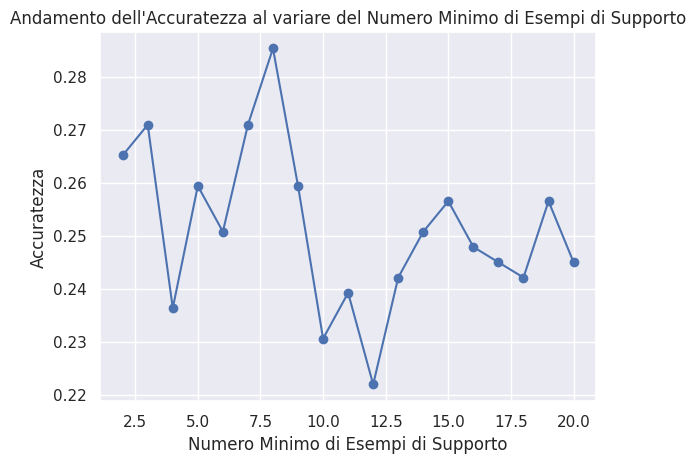

In [62]:
plot_accuracy_vs_min_samples(X, y, np.arange(2,21))

I valori ottimizzati si ottengono con un numero minimo nelle foglie compreso tra 6 e 9.

### Ottimizzazione del'albero decisionale sui valori di fold per la cross validation

In [ ]:
# List of cv values to test
cv_values = [5, 10, 15, 20]

# Iterate over different cv values
for cv in cv_values:
    model3 = DecisionTreeClassifier(criterion='gini')
    scores3 = cross_val_score(model3, X, y, cv=cv)
    mean_accuracy3 = scores3.mean()
    print("CV:", cv)
    print("Mean Accuracy:", mean_accuracy3)
    print("Scores:", scores3)
    print("----------")

CV: 5
Mean Accuracy: 0.24476534296028882
Scores: [0.23826715 0.25270758 0.24548736 0.23465704 0.25270758]
----------
CV: 10
Mean Accuracy: 0.2577312063392764
Scores: [0.30935252 0.20863309 0.28057554 0.22302158 0.30935252 0.20289855
 0.2826087  0.24637681 0.25362319 0.26086957]
----------
CV: 15
Mean Accuracy: 0.24402368708119054
Scores: [0.29032258 0.2688172  0.1827957  0.20430108 0.30107527 0.20652174
 0.22826087 0.2826087  0.19565217 0.30434783 0.19565217 0.19565217
 0.25       0.20652174 0.34782609]
----------
CV: 20
Mean Accuracy: 0.24410973084886126
Scores: [0.24285714 0.21428571 0.28571429 0.2        0.18571429 0.27536232
 0.33333333 0.27536232 0.28985507 0.26086957 0.24637681 0.2173913
 0.26086957 0.36231884 0.17391304 0.2173913  0.2173913  0.1884058
 0.14492754 0.28985507]
----------


Passiamo alla massima ottimizzazione del parametro di cross-fold-validation  e plottiamo i risultati per capire quale sia il migliore.

In [ ]:
# Questo esperimento è stato condoto su un range con max 31, 100 e 300 non si è andato
# oltre poichè già con fold da 300 è diffile che ci siano
cv_range = range(2, 31)  # parametri da provare per la cross-val
mean_accuracies_list = [] # raccolta dei risultati

for cv in cv_range:
    model4 = DecisionTreeClassifier(criterion='gini')
    scores4 = cross_val_score(model4, X, y, cv=cv)
    mean_accuracy4 = scores4.mean()
    mean_accuracies_list.append(mean_accuracy4)
    print("CV:", cv)
    print("Mean Accuracy:", mean_accuracy4)
    print("Scores:", scores4)
    print("----------")

# Plotting the mean accuracies
plt.plot(cv_range, mean_accuracies_list)
plt.xticks(np.arange(0, 31, 5))
plt.xlabel('Number of folds (cv)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Mean Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, fbeta_score, precision_score, recall_score, roc_curve
decision_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.18018018018018017


## Addestramento dell'albero sul data set iniziale per avere una baseline

In [ ]:
# Preparazione delle features e del target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# Divisione del dataset in dati di training e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Creazione del modello di albero decisionale
model = DecisionTreeClassifier()

# Addestramento del modello sui dati di training completi
model.fit(X_train, y_train)

# Applicazione della cross-validation con 10 fold sui dati di training
scores = cross_val_score(model, X_train, y_train, cv=10)

# Calcolo della media delle performance ottenute
mean_accuracy = scores.mean()

# Valutazione del modello sui dati di test
test_accuracy = model.score(X_test, y_test)

# Stampa delle performance
print("Accuracy media (cross-validation):", mean_accuracy)
print("Accuracy sui dati di test:", test_accuracy)

Accuracy media (cross-validation): 0.2418427518427518
Accuracy sui dati di test: 0.21299638989169675


dopo i pessimi risultati ottenuti vogliamo capire che cosa avrebbe fatto un modello che banalmente avrebbe sempre predetto la classe più frequente del data set


In [ ]:
# Prepazione del target
y_t = df['Baselinehistological staging']

# Calcolo della classe media del target
y_p = [4] * len(y_t)

# Calcolo dell'accuratezza
acc = accuracy_score(y_t, y_p)

# Stampa dell'accuratezza
print("Accuracy:", acc)

Accuracy: 0.26137184115523465


conclusione ad oggi il modello è pessimo!!!!!!

## Ottimizzazione dei parametri tramite una grid search

In [75]:
# questa funzione va a valutare un dizionario di parametri che le viene ad essere passato in input
def grid_search_and_plot(X, y, param_grid):
    # Suddivisione del dataset in set di addestramento e test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

    param_names = list(param_grid.keys())
    num_params = len(param_names)

    # Inizializzazione delle liste per l'accuratezza e i valori dei parametri
    accuracies = []
    param_values = []

    # Iterazione attraverso i diversi parametri che sono forniti i input con il dizionario
    for param_name in param_names:
        param_range = param_grid[param_name]

        # Inizializzazione delle liste per l'accuratezza corrente e i valori del parametro corrente
        current_accuracies = []
        current_param_values = []

        # Iterazione attraverso i diversi valori del parametro corrente
        for param_value in param_range:
            # Creazione del dizionario dei parametri
            param_dict = {param_name: param_value}

            # Addestramento del modello con i parametri correnti selezionati
            clf = DecisionTreeClassifier(**param_dict)
            clf.fit(X_train, y_train)

            # Valutazione dell'accuratezza del modello sul set di test
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Memorizzazione dei risultati correnti
            current_accuracies.append(accuracy)
            current_param_values.append(param_value)

        # Memorizzazione delle liste correnti nella lista globale
        accuracies.append(current_accuracies)
        param_values.append(current_param_values)

    # Tracciamento dei grafici per l'andamento dei diversi parametri rispetto all'accuratezza
    for i in range(num_params):
        plt.figure()
        plt.plot(param_values[i], accuracies[i], marker='o')
        plt.xlabel(param_names[i])
        plt.ylabel('Accuratezza')
        plt.title(f'Andamento dell\'Accuratezza in funzione di {param_names[i]}')
        plt.show()

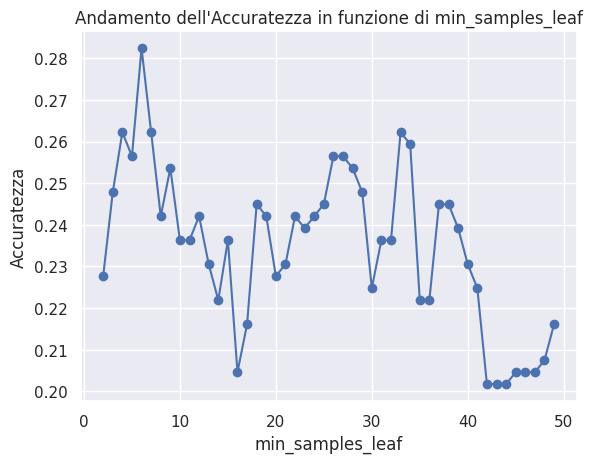

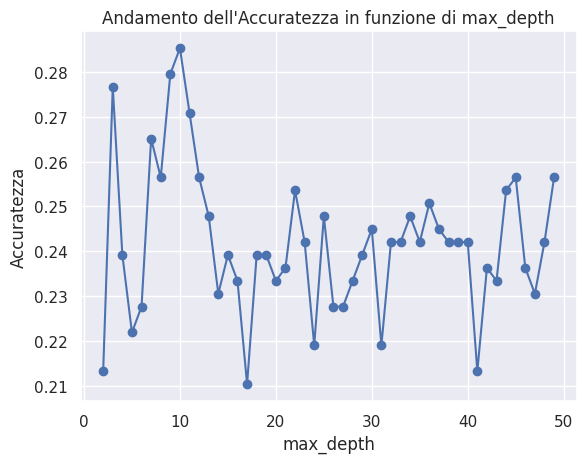

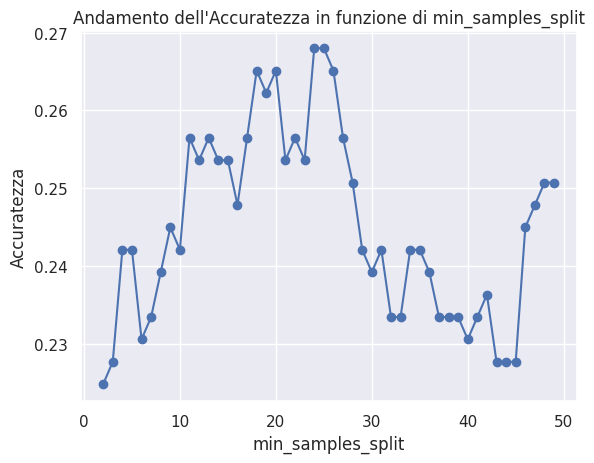

In [76]:
# settaggio delle liste di parametri e del dizionario che passeremo in input alla funzione per aandare a ottimizzare i
# i parametri contenenti ogniuno le rispettive liste di valori da valutare.
testing_val = range(2,50)
parameter_test = {
    'min_samples_leaf': testing_val,
    'max_depth': testing_val,
    'min_samples_split': testing_val
}

grid_search_and_plot(X, y, parameter_test)

Adesso andiamo ad effettuare un refractioning della precedente funzione che abbiamo utilizzato per l'ottimizzazione solo di alcuni parametri e la miglioriamo in modo che sia capace di effettuare una grid search completa su tutti i parametri dell'albero e in fine ci plotti dei grafici che mettano in relazione l'accuratenza con i parametri che abbiamo fatto variare in alcuni particolare range. Questo test sarà decisivo ci permetterà di estrarre i parametri dell'albero migliori i quali utilizzerremo per l'addestramento e valutazione finale dell'albero decisionale ottimizzato.

In [73]:
def grid_search_and_plot_fullOttimization(X, y, param_grid):
    # Suddivisione del dataset in set di addestramento e test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

    param_names = list(param_grid.keys())
    num_params = len(param_names)

    # Inizializzazione delle liste per l'accuratezza e i valori dei parametri
    accuracies = [[] for _ in range(num_params)]
    param_values = [[] for _ in range(num_params)]

    # Iterazione attraverso i diversi parametri
    for i, param_name in enumerate(param_names):
        param_range = param_grid[param_name]

        # Iterazione attraverso i diversi valori del parametro corrente
        for param_value in param_range:
            # Creazione del dizionario dei parametri
            param_dict = {param_name: param_value}

            # Addestramento del modello con i parametri correnti
            clf = DecisionTreeClassifier(**param_dict)
            clf.fit(X_train, y_train)

            # Valutazione dell'accuratezza del modello sul set di test
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Memorizzazione dei risultati correnti
            accuracies[i].append(accuracy)
            param_values[i].append(param_value)

        # Tracciamento del grafico per l'andamento del parametro corrente rispetto all'accuratezza
        plt.figure()
        plt.plot(param_values[i], accuracies[i], marker='o')
        plt.xlabel(param_names[i])
        plt.ylabel('Accuratezza')
        plt.title(f'Andamento dell\'Accuratezza in funzione di {param_names[i]}')
        plt.show()

    #return accuracies, param_values


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


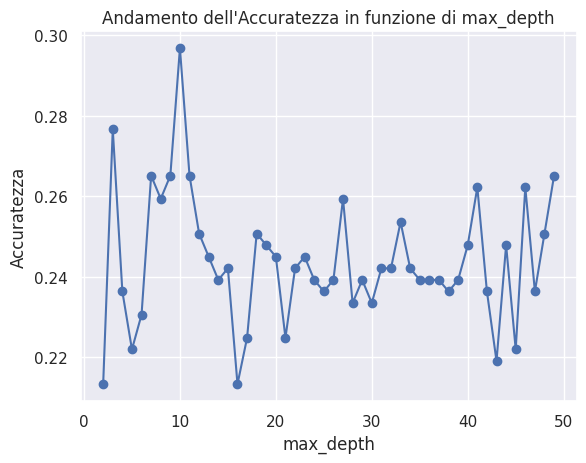

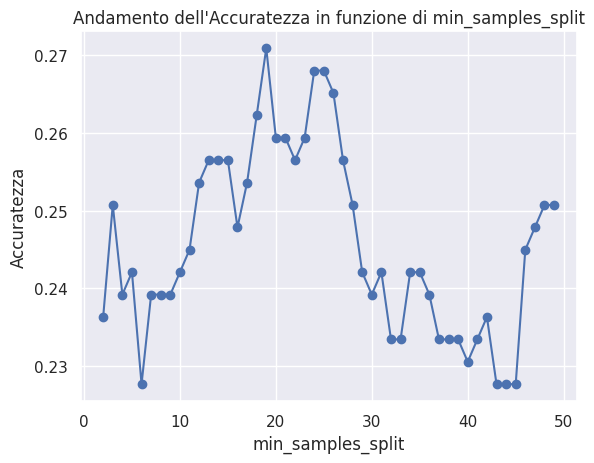

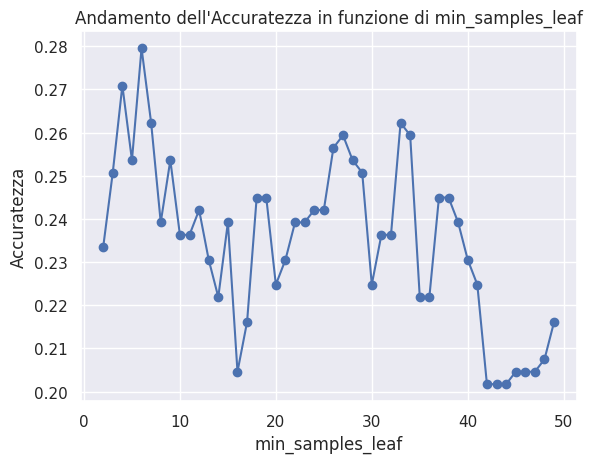

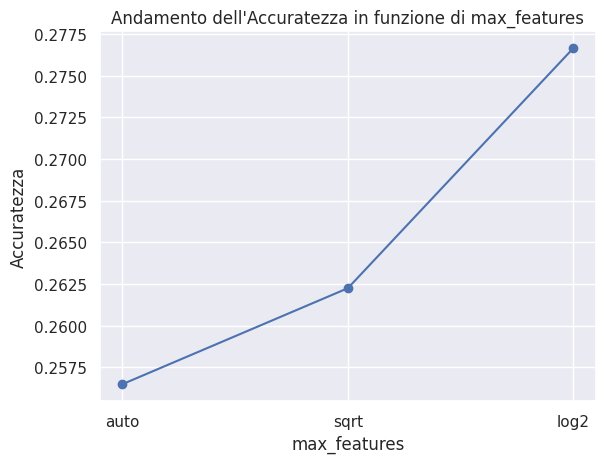

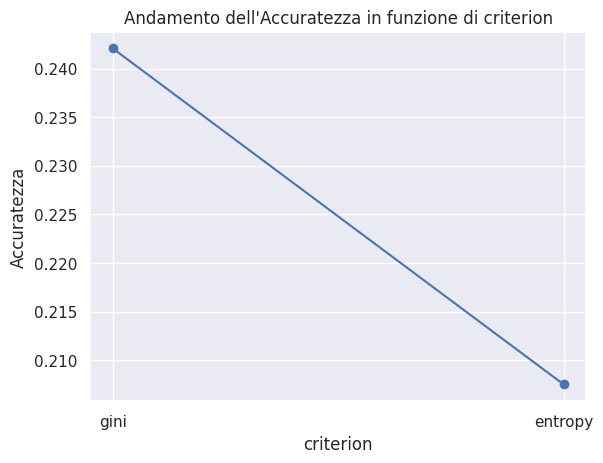

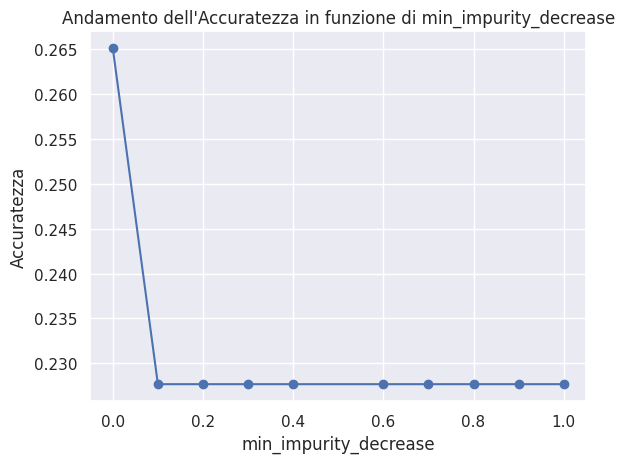

In [78]:
# creiamo una lista di valori per il test sul parametro min_impurity_decrease
test_impurity_val = np.around(np.linspace(0.0, 1.0, num=10), decimals=1)

# istanziamo e assegnamo il dizionario contenente i parametri da testare e i rispettivi valori assegnati per il test
param_grid = {
    'max_depth': testing_val,
    'min_samples_split': testing_val,
    'min_samples_leaf': testing_val,
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': test_impurity_val
}

# eseguiamo i test di ottimizzazione dei parametri tramite grid search
grid_search_and_plot(X, y, param_grid)

#### Conclusioni sull'ottimizzazione dei parametri dell'albero
Dopo aver eseguito una serie approfonditaa di test di ottimizzazione giungiamo alla conclusione che i migliori parametri da ultilizzare per l'addestramento del modello  finale sono:
- max_depth = 10 // profondità albero
- min_sample_split = 25 // supporto minimo di esempi per la divisione
- min_sample_leaf = 6 // minimo supporto di esempi nelle foglie
- max feature = log2
- criterion = gini
- min_impurity_decrease = 0.0

Con questa configurazione di parametri procediamo all'addestramento del modello ottimizzato.

##### Addestramento finale sul modello ottimizzato

In [107]:
Ottimized_Tree = DecisionTreeClassifier(max_depth=10, min_samples_split=25, min_samples_leaf=6, max_features='log2', criterion='gini', min_impurity_decrease=0)

# usiamo la cross-val
scores_ottimized_tree = cross_val_score(Ottimized_Tree, X, y, cv=10)
mean_accurancy_ottimized_tree = scores_ottimized_tree.mean()
print(scores_ottimized_tree)
print(mean_accurancy_ottimized_tree)

[0.1942446  0.25179856 0.27338129 0.25179856 0.25179856 0.32608696
 0.23913043 0.22463768 0.25362319 0.26086957]
0.2527369408820769


###### Comclusioni sul modello ottimizzato
Le ottimizzazione sembravano essere promettenti dai test che abbiamo eseguito, ma portroppo il modello con il set di parametri ottimizzato sembra essere inadeguato e non batte la moda.